# Long term projections

In [2]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from scipy.stats import linregress

import knmi23_module as knmi23

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [3]:
importlib.reload(knmi23)

<module 'knmi23_module' from '/Users/dewilebars/Projects/KNMIClimateScenarios2021-2023/2023_KNMI2023/KNMI23_SeaLevelScenarios/knmi23_module.py'>

In [4]:
Projects_dir = '/Users/dewilebars/Projects/'
ProbSLR_dir = f'{Projects_dir}Project_ProbSLR/SLProj/'

In [13]:
REG = 'Netherlands'

## Read projections for the ocean dynamics

In [14]:
proj_data_dir = f'{ProbSLR_dir}/outputs/KNMI23/'

if REG == 'Netherlands':
    KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_v19.nc')
    KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_v19.nc')
elif REG == 'Bonaire':
    KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_Bonaire_v01.nc')
    KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_Bonaire_v01.nc')
elif REG == 'Saba':
    KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_Saba_v01.nc')
    KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_Saba_v01.nc')
    
KNMI23_ssp126 = knmi23.new_ref_period(KNMI23_ssp126.perc_ts)
KNMI23_ssp585 = knmi23.new_ref_period(KNMI23_ssp585.perc_ts)

In [15]:
KNMI23_ssp585

<xarray.DataArray 'perc_ts' (proc: 13, percentiles: 12, time: 106)>
array([[[-9.45679406e-01, -9.16254210e-01, -8.86829014e-01, ...,
          1.69371280e+01,  1.72308927e+01,  1.75264187e+01],
        [-9.45679406e-01, -8.97918696e-01, -8.50157987e-01, ...,
          2.09717647e+01,  2.13495324e+01,  2.17303177e+01],
        [-9.45679406e-01, -8.88133324e-01, -8.30587242e-01, ...,
          2.31249862e+01,  2.35475849e+01,  2.39738718e+01],
        ...,
        [-9.45679406e-01, -8.09803335e-01, -6.73927264e-01, ...,
          4.03611024e+01,  4.11425652e+01,  4.19330829e+01],
        [-9.45679406e-01, -7.91620794e-01, -6.37562181e-01, ...,
          4.43620783e+01,  4.52268432e+01,  4.61019089e+01],
        [-9.45679406e-01, -8.53831316e-01, -7.61983225e-01, ...,
          3.06729689e+01,  3.12527202e+01,  3.18385098e+01]],

       [[-8.75060666e-01, -1.01862288e+00, -1.16218509e+00, ...,
          5.56857251e+00,  5.45758622e+00,  5.32056204e+00],
        [-8.75060666e-01, -9.51705214e-01, -1.02834976e+00, ...,
          9.52150361e+00,  9.51563227e+00,  9.49131532e+00],
        [-8.75060666e-01, -9.15992320e-01, -9.56923974e-01, ...,
          1.16311202e+01,  1.16813470e+01,  1.17171801e+01],
...
        [-3.51500000e-01, -3.14500000e-01, -2.77500000e-01, ...,
          3.45950000e+00,  3.49650000e+00,  3.53350000e+00],
        [-3.51500000e-01, -3.14500000e-01, -2.77500000e-01, ...,
          3.45950000e+00,  3.49650000e+00,  3.53350000e+00],
        [-3.51500000e-01, -3.14500000e-01, -2.77500000e-01, ...,
          3.45950000e+00,  3.49650000e+00,  3.53350000e+00]],

       [[-3.12647859e+00, -3.11395457e+00, -3.10143055e+00, ...,
          4.93844462e+01,  5.01328472e+01,  5.07931602e+01],
        [-3.12647859e+00, -3.02715914e+00, -2.92783969e+00, ...,
          5.72750864e+01,  5.81941569e+01,  5.90388788e+01],
        [-3.12647859e+00, -2.98103219e+00, -2.83558579e+00, ...,
          6.16783673e+01,  6.26923225e+01,  6.36450105e+01],
        ...,
        [-3.12647859e+00, -2.60140309e+00, -2.07632759e+00, ...,
          1.18703476e+02,  1.21360939e+02,  1.23955309e+02],
        [-3.12647859e+00, -2.49843522e+00, -1.87039184e+00, ...,
          1.84782125e+02,  1.89130710e+02,  1.94537853e+02],
        [-3.12647859e+00, -2.81716904e+00, -2.50785949e+00, ...,
          8.30522244e+01,  8.46251363e+01,  8.61466438e+01]]])
Coordinates:
  * proc         (proc) object 'Global steric' ... 'Total'
  * percentiles  (percentiles) object '1' '5' '10' '17' ... '95' '99' 'mean'
  * time         (time) float64 1.996e+03 1.996e+03 ... 2.1e+03 2.1e+03

## Extrapollate the dynamics into the future

Two assumptions are made to extrapollate ODSL up to 2300:
- For ssp126 dynamics doesn't contribute to sea level after 2100.
- For ssp585 it continues linearly.

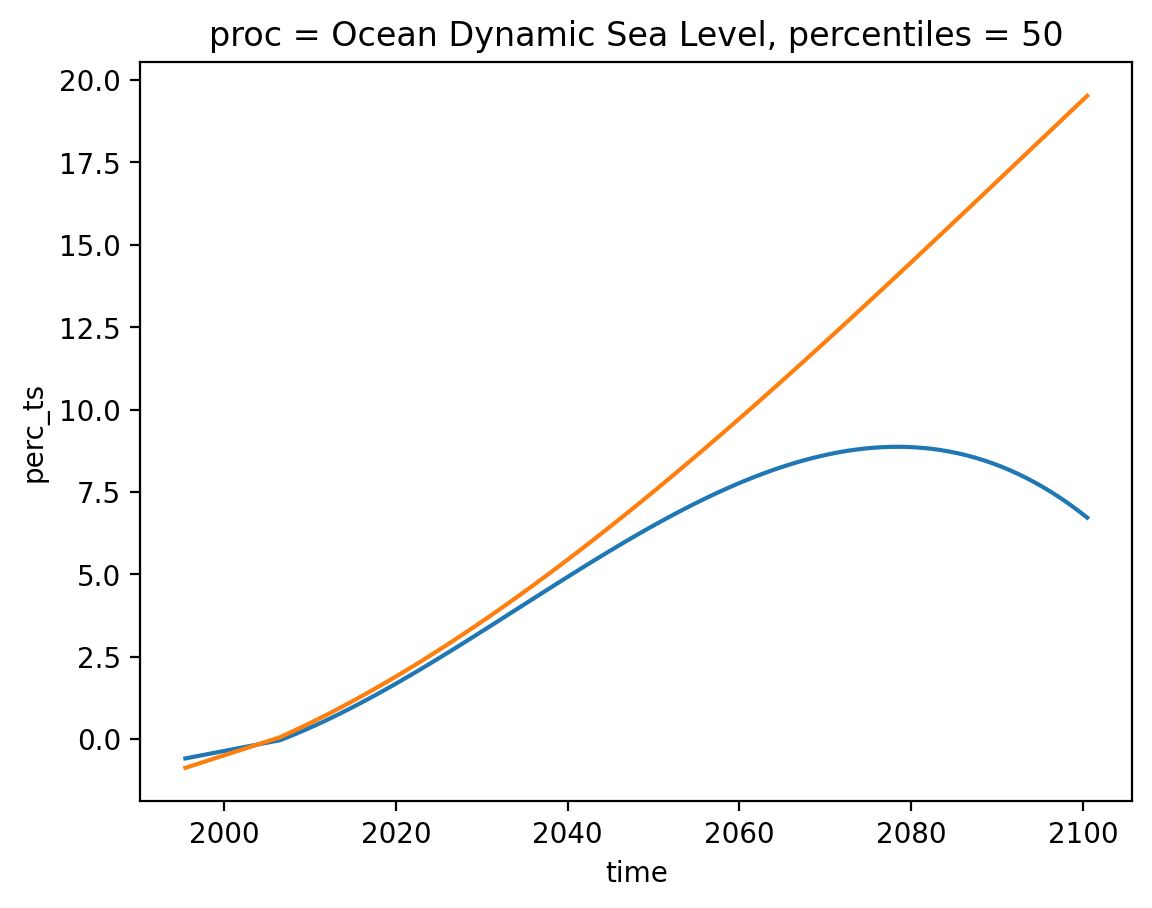

In [16]:
#KNMIsigBNW_sub_26, KNMIsigBNW_sub_45, KNMIsigBNW_sub_85
KNMI23_ssp126.sel(proc='Ocean Dynamic Sea Level', percentiles='50').plot()
KNMI23_ssp585.sel(proc='Ocean Dynamic Sea Level', percentiles='50').plot()


Text(0.5, 1.0, 'ssp126')

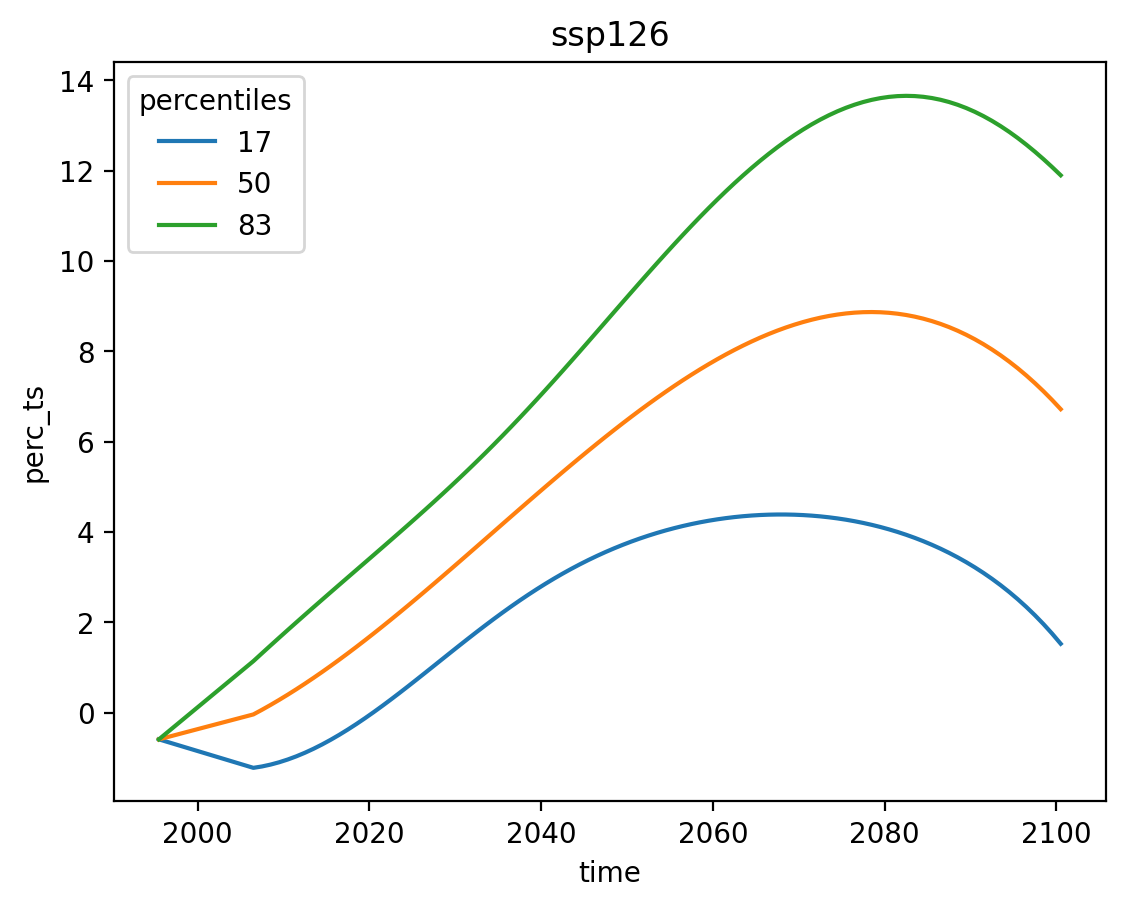

In [17]:
#KNMIsigBNW_sub_26, KNMIsigBNW_sub_45, KNMIsigBNW_sub_85
KNMI23_ssp126.sel(proc='Ocean Dynamic Sea Level', percentiles=['17','50','83']).plot.line(x='time')
plt.title('ssp126')
#plt.savefig('./Figures/OceanDynamics_KNMIsigBNW_ssp126.pdf' ,dpi=150)

In [18]:
KNMI23_ssp126.sel(proc='Ocean Dynamic Sea Level', percentiles=['17','50','83'], time=slice(2095,2100)).mean(dim='time')

ssp126_odyn = pd.DataFrame(index=[2150, 2300])
ssp126_odyn.index.name = 'time'

for perc in ['17','50','83']:
    ssp126_odyn[perc] = KNMI23_ssp126.sel(proc='Ocean Dynamic Sea Level', 
                                          percentiles=perc, 
                                          time=slice(2095,2100)).mean(dim='time').values
ssp126_odyn = ssp126_odyn/100 # Convert from cm to m
ssp126_odyn

,17,50,83
time,,,
2150,0.021444,0.072835,0.124078
2300,0.021444,0.072835,0.124078


Text(0.5, 1.0, 'ssp585')

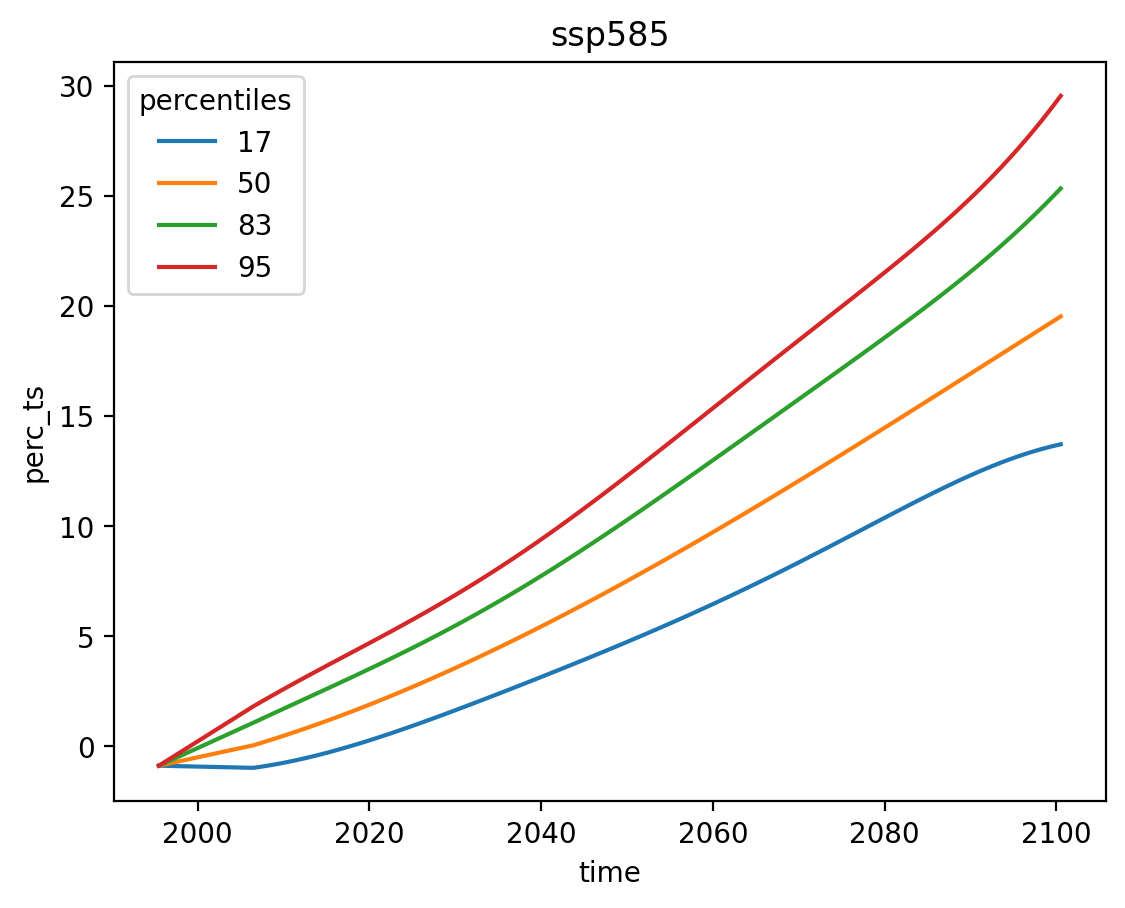

In [19]:
KNMI23_ssp585.sel(proc='Ocean Dynamic Sea Level', percentiles=['17','50','83', '95']).plot.line(x='time')
plt.title('ssp585')
#plt.savefig('./Figures/OceanDynamics_KNMIsigBNW_ssp585.pdf' ,dpi=150)

In [20]:
time_v = np.arange(2006,2301,1)
ssp585_odyn = pd.DataFrame(index=time_v)
ssp585_odyn.index.name = 'time'

for perc in ['17','50','83', '95']:
    lr = linregress(KNMI23_ssp585.time, 
                    KNMI23_ssp585.sel(proc='Ocean Dynamic Sea Level', percentiles=perc))

    ssp585_odyn[perc] = time_v*lr.slope + lr.intercept
    
ssp585_odyn = ssp585_odyn/100 # Convert from cm to m

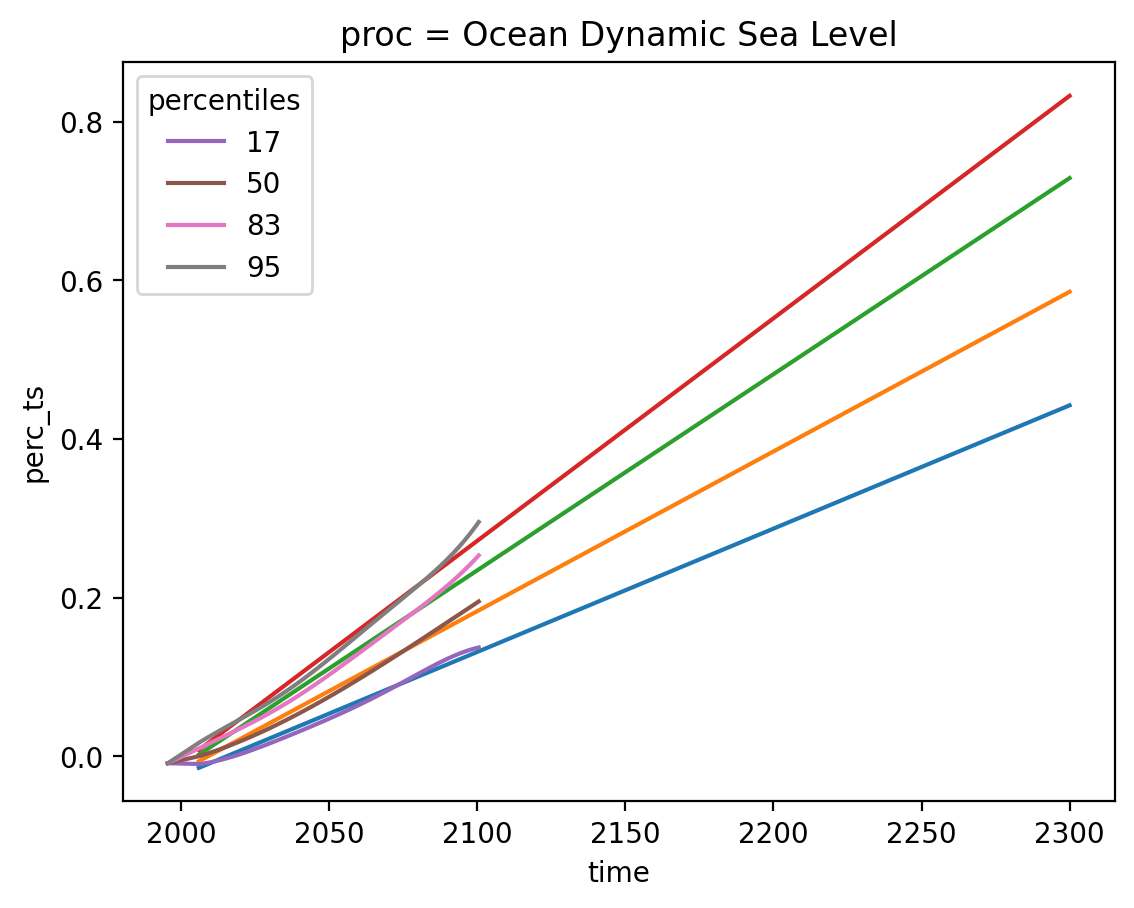

In [21]:
ssp585_odyn.plot()
(KNMI23_ssp585.sel(proc='Ocean Dynamic Sea Level', percentiles=['17','50','83', '95'])/100).plot.line(x='time')

## Copy data from Word and store in a dataframe

The reference period for the data is 1995-2014

In [22]:
col_names = ['lo2150', 'med2150', 'up2150', 'lo2300', 'up2300']
indexes = ['Thermal exp.', 'Greenland', 'Antarctica', 'Glaciers', 'Land Storage', 'Total']

glo_ssp126 = [[.14, .18, .23, .19, .35],
              [.10, .13, .17, .11, .25],
              [-.03, .18, .49, -.14, .78],
              [.09, .13, .18, .13, .30],
              [.03, .05, .06, .05, .10],
              [.46, .69, 1.00, .60, 1.50]]

glo_ssp585 = [[.45, .55, .68, .91, 1.50],
              [.22, .27, .35, .32, 1.74],
              [-.09, .17, .68, -.27, 3.17],
              [.20, .31, .32, .32, .32],
              [.03, .05, .06, .05, .10],
              [1.02, 1.35, 1.89, 2.20, 5.90]]

glo_ssp585_hpp = [[.45, .55, .68, .91, 1.50],
                  [.18, .31, .98, .32, 1.74],
                  [-.09, .77, 3.68, 6.87, 13.54],
                  [.20, .31, .32, .32, .32],
                  [.03, .05, .06, .05, .10],
                  [1.02, 1.99, 4.83, 9.50, 16.20]]

glo_ssp126_df = pd.DataFrame(glo_ssp126, columns=col_names, index=indexes)
glo_ssp585_df = pd.DataFrame(glo_ssp585, columns=col_names, index=indexes)
glo_ssp585_hpp_df = pd.DataFrame(glo_ssp585_hpp, columns=col_names, index=indexes)                             

glo_ssp126_df

,lo2150,med2150,up2150,lo2300,up2300
Thermal exp.,0.14,0.18,0.23,0.19,0.35
Greenland,0.10,0.13,0.17,0.11,0.25
Antarctica,-0.03,0.18,0.49,-0.14,0.78
Glaciers,0.09,0.13,0.18,0.13,0.30
Land Storage,0.03,0.05,0.06,0.05,0.10
Total,0.46,0.69,1.00,0.60,1.50


## Check that the total can be computed from the individual components assuming the values follow a half-normal distribution on each side of the median

Assume independence and add the squared standard deviations.

Treat both sides of the median independently, with each it's own standard deviation.

In [23]:
def compute_total(df, name_tot, nbp):
    total2 = np.zeros(5)
    total2[1] = df['med2150'].iloc[0:nbp].sum()
    std_low = np.sqrt(((df['med2150'].iloc[0:nbp]-df['lo2150'].iloc[0:nbp])**2).sum())
    total2[0] = total2[1] - std_low
    std_high = np.sqrt(((df['up2150'].iloc[0:nbp]-df['med2150'].iloc[0:nbp])**2).sum())
    total2[2] = total2[1] + std_high

    mid = (df['up2300'].iloc[0:nbp] + df['lo2300'].iloc[0:nbp])/2
    mid_tot = mid.sum()
    std_low = np.sqrt(((mid-df['lo2300'].iloc[0:nbp])**2).sum())
    total2[3] = mid_tot - std_low
    std_high = np.sqrt(((df['up2300'].iloc[0:nbp]-mid)**2).sum())
    total2[4] = mid_tot + std_high

    df.loc[name_tot] = total2
    
    return df

In [24]:
proj_scen = ['ssp126', 'ssp585', 'ssp585_hpp']
all_df = [glo_ssp126_df, glo_ssp585_df, glo_ssp585_hpp_df]
for sce, df in zip(proj_scen, all_df):
    print(sce)
    new_df = compute_total(df, 'Total2', 5)
    display(new_df)

ssp126


,lo2150,med2150,up2150,lo2300,up2300
Thermal exp.,0.140000,0.18,0.230000,0.190000,0.350000
Greenland,0.100000,0.13,0.170000,0.110000,0.250000
Antarctica,-0.030000,0.18,0.490000,-0.140000,0.780000
Glaciers,0.090000,0.13,0.180000,0.130000,0.300000
Land Storage,0.030000,0.05,0.060000,0.050000,0.100000
Total,0.460000,0.69,1.000000,0.600000,1.500000
Total2,0.449546,0.67,0.990624,0.579636,1.540364


ssp585


,lo2150,med2150,up2150,lo2300,up2300
Thermal exp.,0.450000,0.55,0.680000,0.910000,1.500000
Greenland,0.220000,0.27,0.350000,0.320000,1.740000
Antarctica,-0.090000,0.17,0.680000,-0.270000,3.170000
Glaciers,0.200000,0.31,0.320000,0.320000,0.320000
Land Storage,0.030000,0.05,0.060000,0.050000,0.100000
Total,1.020000,1.35,1.890000,2.200000,5.900000
Total2,1.045698,1.35,1.882541,2.195816,5.964184


ssp585_hpp


,lo2150,med2150,up2150,lo2300,up2300
Thermal exp.,0.45000,0.55,0.680000,0.910000,1.500000
Greenland,0.18000,0.31,0.980000,0.320000,1.740000
Antarctica,-0.09000,0.77,3.680000,6.870000,13.540000
Glaciers,0.20000,0.31,0.320000,0.320000,0.320000
Land Storage,0.03000,0.05,0.060000,0.050000,0.100000
Total,1.02000,1.99,4.830000,9.500000,16.200000
Total2,1.10739,1.99,4.978996,9.412432,16.257568


## Multiply individual contributors by their local fingerprints

Assumptions: 

1- AR5 fingerprints keep constant after 2100

2- Greenland smb and dynamics contribute each half

3- Only Antarctic dynamics dominates the fingerprint

In [25]:
def build_loc_proj(glo_df, fp, sce):
    
    # Multiply by fingerprints
    df = glo_df.iloc[0:5].copy()
    df['reg_fingerprints'] = fp
    df.update(df.iloc[:, :-1].mul(df.reg_fingerprints, 0))
    del(df['reg_fingerprints'])
    
    # Add vertical land motion as in the Zeespiegelmonitor
    vlm_2150 = 0.45*(2150-2005) # 0.45 mm/y
    vlm_2300 = 0.45*(2300-2005)
    df.loc['VLM'] = np.array([vlm_2150, vlm_2150, vlm_2150, 
                              vlm_2300, vlm_2300])/1000
    
    # Add ocean dynamics
    odyn = np.ones(5)
    if sce == 'ssp126':
        odyn[0:3] = ssp126_odyn[['17','50','83']].loc[2150]
        odyn[3] = ssp126_odyn['17'].loc[2300]
        odyn[4] = ssp126_odyn['83'].loc[2300]
    elif sce == 'ssp585':
        odyn[0:3] = ssp585_odyn[['17','50','83']].loc[2150]
        odyn[3] = ssp585_odyn['17'].loc[2300]
        odyn[4] = ssp585_odyn['83'].loc[2300]
    else:
        print(f'ERROR: scenario {sce} not available')

    df.loc['Ocean Dyn.'] = odyn
    
    return df

In [26]:
# Use latitude 53ºN and longitude 5ºE
fingerprints = knmi23.read_constant_fp('AR5', 53, 5)

# Build fingerprints for the table
fp = [1, 
      (fingerprints['GSMB']+fingerprints['GDYN'])/2, 
      fingerprints['ADYN'], 
      fingerprints['GIC'], 
      fingerprints['GW']]

loc_ssp126_df = build_loc_proj(glo_ssp126_df, fp, 'ssp126')
loc_ssp126_df = compute_total(loc_ssp126_df, 'Total', 7)

loc_ssp585_df = build_loc_proj(glo_ssp585_df, fp, 'ssp585')
loc_ssp585_df = compute_total(loc_ssp585_df, 'Total', 7)

loc_ssp126_df.index.name = 'proc'
loc_ssp585_df.index.name = 'proc'

In [27]:
loc_ssp126_df

,lo2150,med2150,up2150,lo2300,up2300
proc,,,,,
Thermal exp.,0.140000,0.180000,0.230000,0.190000,0.350000
Greenland,0.021402,0.027823,0.036384,0.023543,0.053506
Antarctica,-0.033282,0.199690,0.543600,-0.155314,0.865323
Glaciers,0.067325,0.097247,0.134649,0.097247,0.224415
Land Storage,0.021166,0.035276,0.042331,0.035276,0.070552
VLM,0.065250,0.065250,0.065250,0.132750,0.132750
Ocean Dyn.,0.021444,0.072835,0.124078,0.021444,0.124078
Total,0.433882,0.678121,1.031564,0.559299,1.606270


In [28]:
loc_ssp585_df

,lo2150,med2150,up2150,lo2300,up2300
proc,,,,,
Thermal exp.,0.450000,0.550000,0.680000,0.910000,1.500000
Greenland,0.047085,0.057786,0.074908,0.068488,0.372401
Antarctica,-0.099845,0.188596,0.754384,-0.299535,3.516762
Glaciers,0.149610,0.231896,0.239376,0.239376,0.239376
Land Storage,0.021166,0.035276,0.042331,0.035276,0.070552
VLM,0.065250,0.065250,0.065250,0.132750,0.132750
Ocean Dyn.,0.209272,0.283620,0.358046,0.442428,0.728942
Total,1.087139,1.412424,1.998047,2.102624,5.986942


In [36]:
# Make a new dataframe to plot: Median, 17pc, 83pc
proj_scen = ['ssp126', 'ssp585']

col = []
for scen_name in proj_scen:
    col.extend([f'{scen_name}_17', f'{scen_name}_50', f'{scen_name}_83'])
long_df = pd.DataFrame(columns=col , index=[2006.5, 2050.5, 2100.5, 2150.5, 2300.5])

for ds, scen_name in zip([KNMI23_ssp126 , KNMI23_ssp585],
                         proj_scen):
    for perc  in ['17', '50', '83']:
        long_df[f'{scen_name}_{perc}'].iloc[0:3] = ds.sel(percentiles=perc, 
                                                proc='Total', 
                                                time=[2006.5, 2050.5, 2100.5]).values

long_df = long_df/100 # Convert from cm to m
perc_n = {17:'lo', 50:'med', 83:'up'}        

for df, scen_name in zip([loc_ssp126_df , loc_ssp585_df],
                         proj_scen):
    for perc  in [17, 50, 83]:
        long_df[f'{scen_name}_{perc}'].iloc[3] = df[f'{perc_n[perc]}2150'].Total
    for perc  in [17, 83]:
        long_df[f'{scen_name}_{perc}'].iloc[4] = df[f'{perc_n[perc]}2300'].Total
        
long_df.index.name = 'time'

In [37]:
long_df

,ssp126_17,ssp126_50,ssp126_83,ssp585_17,ssp585_50,ssp585_83
time,,,,,,
2006.5,-0.008892,0.001679,0.012701,-0.008252,0.00182,0.012316
2050.5,0.179613,0.230739,0.28941,0.198895,0.251664,0.311445
2100.5,0.379075,0.481919,0.633791,0.647542,0.806297,1.040083
2150.5,0.412496,0.653849,1.005328,0.884101,1.210077,1.796063
2300.5,0.536446,NaN,1.580753,1.68135,NaN,5.565907


## Export data as csv files

In [38]:
loc_ssp126_df.to_csv(f'./outputs/knmi23_long_term_components_ssp126_{REG}.csv')
loc_ssp585_df.to_csv(f'./outputs/knmi23_long_term_components_ssp585_{REG}.csv')
ssp585_odyn.to_csv(f'./outputs/knmi23_odyn_extrapolation2300_ssp585_{REG}.csv')
long_df.to_csv(f'./outputs/knmi23_long_term_projections_{REG}.csv')
